# Avaliação dos dados

In [2]:
import pandas as pd
from scipy.io import arff
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns

In [3]:
arff_file = arff.loadarff('data/house_16H.arff')
arff_file_reg = arff.loadarff('data/house_16Hreg.arff') # apenas para verificar o limiar pro target

In [4]:
arff_file[1]

Dataset: house_16H
	P1's type is numeric
	P5p1's type is numeric
	P6p2's type is numeric
	P11p4's type is numeric
	P14p9's type is numeric
	P15p1's type is numeric
	P15p3's type is numeric
	P16p2's type is numeric
	P18p2's type is numeric
	P27p4's type is numeric
	H2p2's type is numeric
	H8p2's type is numeric
	H10p1's type is numeric
	H13p1's type is numeric
	H18pA's type is numeric
	H40p4's type is numeric
	binaryClass's type is nominal, range is ('P', 'N')

P1 ---- total persons count in the region

P5.1 --- percentage of males

P6.2 --- percentage of black people

P11.4 -- percentage over 64 years old

P14.9 -- percentage widowed females

P15.1 -- percentage of people in family HH's

P15.3 -- percentage of people in group quarters (incl jails)

P16.2 -- percentage of HH's with 2 or more persons which are family HH-lds

P18.2 -- percentage of HH's with 1+ persons under 18 which are non-family HH-lds

P27.4 -- percentage of HH-lds which are non-family with 2+ persons

H2.2 --- percentage of HU's vacant

H8.2 --- percentage of occ-ed HU's with black HH-lder

H10.1 -- percentage of occ-ed HU's with HH-lder not of Hispanic origin

H13.1 -- percentage of HU's with 1-4 rooms

H18.A -- average number of persons per ownOcc HU's

H40.4 -- percentage of vacant-for-sale HU's vacant more then 6 months

In [4]:
df = pd.DataFrame(arff_file[0])
df['binaryClass'] = df["binaryClass"].map({b'N': 0, b'P': 1})

In [5]:
df.head()

,P1,P5p1,P6p2,P11p4,P14p9,P15p1,P15p3,P16p2,P18p2,P27p4,H2p2,H8p2,H10p1,H13p1,H18pA,H40p4,binaryClass
0,15512.0,0.460869,0.049252,0.226470,0.149827,0.752837,0.010057,0.579729,0.003251,0.075912,0.625318,0.036613,0.991377,0.260116,0.052246,0.774059,0
1,1550.0,0.470968,0.002581,0.137419,0.096342,0.862581,0.000000,0.695142,0.005025,0.043551,0.064263,0.003350,0.994975,0.285267,0.060606,0.142857,1
2,4741.0,0.485341,0.000211,0.189412,0.135656,0.856992,0.000000,0.683584,0.004143,0.027965,0.065796,0.000000,0.997411,0.315433,0.065116,0.687500,1
3,467.0,0.498929,0.000000,0.100642,0.085470,0.907923,0.000000,0.780488,0.006098,0.018293,0.057471,0.000000,1.000000,0.149425,0.139535,1.000000,1
4,310.0,0.474194,0.680645,0.225807,0.128834,0.896774,0.000000,0.756303,0.008403,0.016807,0.077519,0.672269,0.991597,0.147287,0.000000,0.000000,1


In [6]:
df.to_csv('data/house_16H.csv', index=False)

In [9]:
df.describe()

,P1,P5p1,P6p2,P11p4,P14p9,P15p1,P15p3,P16p2,P18p2,P27p4,H2p2,H8p2,H10p1,H13p1,H18pA,H40p4,binaryClass
count,2.278400e+04,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000
mean,7.808669e+03,0.482297,0.063982,0.163900,0.121538,0.851076,0.020487,0.716131,0.003589,0.033263,0.110527,0.057437,0.967045,0.304993,0.107377,0.491626,0.704003
std,6.587242e+04,0.031876,0.150921,0.080461,0.056687,0.079455,0.057666,0.087264,0.005100,0.029567,0.105925,0.139811,0.099953,0.133998,0.090065,0.331655,0.456500
min,2.000000e+00,0.125000,0.000000,0.000000,0.000000,0.054156,0.000000,0.233702,0.000000,0.000000,0.000000,0.000000,0.003257,0.000000,0.000000,0.000000,0.000000
25%,4.270000e+02,0.464647,0.000000,0.112069,0.081236,0.819686,0.000000,0.662283,0.000000,0.016260,0.049303,0.000000,0.981410,0.221674,0.052770,0.243243,0.000000
50%,1.345500e+03,0.480397,0.003413,0.155484,0.117126,0.863645,0.000000,0.714286,0.002591,0.027523,0.081180,0.002538,0.994100,0.299800,0.086957,0.500000,1.000000
75%,4.518250e+03,0.496040,0.033377,0.203596,0.156757,0.899657,0.019196,0.771039,0.005007,0.042827,0.131430,0.029927,1.000000,0.375000,0.137931,0.750000,1.000000
max,7.322564e+06,0.923077,1.000000,0.917255,0.511872,1.000000,0.943325,1.000000,0.125000,0.705736,0.975177,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.shape

(22784, 17)

P1 Persons (total)

C:\Users\gabri\AppData\Local\Temp\ipykernel_20660\322763247.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(df["binaryClass"].value_counts(), palette="viridis")


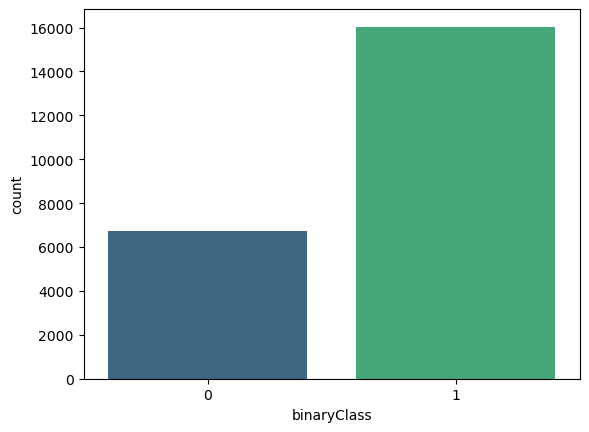

In [9]:
sns.barplot(df["binaryClass"].value_counts(), palette="viridis")
plt.show()

In [10]:
df.describe()

,P1,P5p1,P6p2,P11p4,P14p9,P15p1,P15p3,P16p2,P18p2,P27p4,H2p2,H8p2,H10p1,H13p1,H18pA,H40p4,binaryClass
count,2.278400e+04,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000
mean,7.808669e+03,0.482297,0.063982,0.163900,0.121538,0.851076,0.020487,0.716131,0.003589,0.033263,0.110527,0.057437,0.967045,0.304993,0.107377,0.491626,0.704003
std,6.587242e+04,0.031876,0.150921,0.080461,0.056687,0.079455,0.057666,0.087264,0.005100,0.029567,0.105925,0.139811,0.099953,0.133998,0.090065,0.331655,0.456500
min,2.000000e+00,0.125000,0.000000,0.000000,0.000000,0.054156,0.000000,0.233702,0.000000,0.000000,0.000000,0.000000,0.003257,0.000000,0.000000,0.000000,0.000000
25%,4.270000e+02,0.464647,0.000000,0.112069,0.081236,0.819686,0.000000,0.662283,0.000000,0.016260,0.049303,0.000000,0.981410,0.221674,0.052770,0.243243,0.000000
50%,1.345500e+03,0.480397,0.003413,0.155484,0.117126,0.863645,0.000000,0.714286,0.002591,0.027523,0.081180,0.002538,0.994100,0.299800,0.086957,0.500000,1.000000
75%,4.518250e+03,0.496040,0.033377,0.203596,0.156757,0.899657,0.019196,0.771039,0.005007,0.042827,0.131430,0.029927,1.000000,0.375000,0.137931,0.750000,1.000000
max,7.322564e+06,0.923077,1.000000,0.917255,0.511872,1.000000,0.943325,1.000000,0.125000,0.705736,0.975177,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22784 entries, 0 to 22783
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P1           22784 non-null  float64
 1   P5p1         22784 non-null  float64
 2   P6p2         22784 non-null  float64
 3   P11p4        22784 non-null  float64
 4   P14p9        22784 non-null  float64
 5   P15p1        22784 non-null  float64
 6   P15p3        22784 non-null  float64
 7   P16p2        22784 non-null  float64
 8   P18p2        22784 non-null  float64
 9   P27p4        22784 non-null  float64
 10  H2p2         22784 non-null  float64
 11  H8p2         22784 non-null  float64
 12  H10p1        22784 non-null  float64
 13  H13p1        22784 non-null  float64
 14  H18pA        22784 non-null  float64
 15  H40p4        22784 non-null  float64
 16  binaryClass  22784 non-null  int64  
dtypes: float64(16), int64(1)
memory usage: 3.0 MB


In [12]:
df.isna().sum()

P1             0
P5p1           0
P6p2           0
P11p4          0
P14p9          0
P15p1          0
P15p3          0
P16p2          0
P18p2          0
P27p4          0
H2p2           0
H8p2           0
H10p1          0
H13p1          0
H18pA          0
H40p4          0
binaryClass    0
dtype: int64

C:\Users\gabri\AppData\Local\Temp\ipykernel_20660\1984686083.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(df.iloc[:,1:-1], labels=df.columns[1:-1], vert=False)


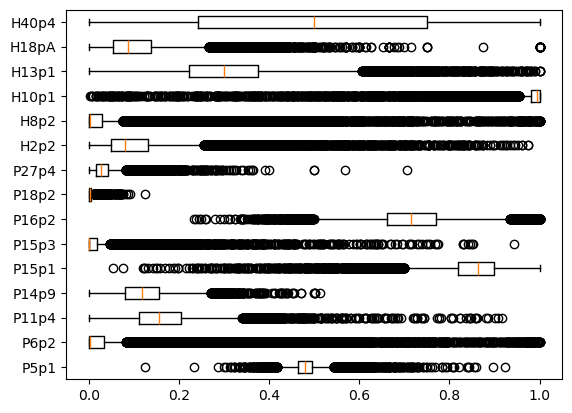

In [13]:
plt.boxplot(df.iloc[:,1:-1], labels=df.columns[1:-1], vert=False)
plt.show()

In [14]:
X = df.iloc[:,:-1]


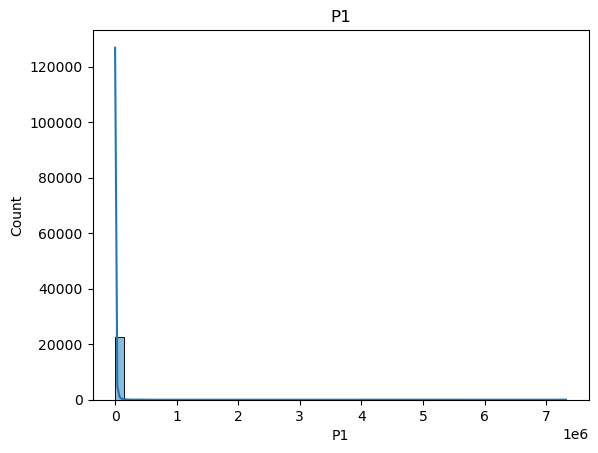

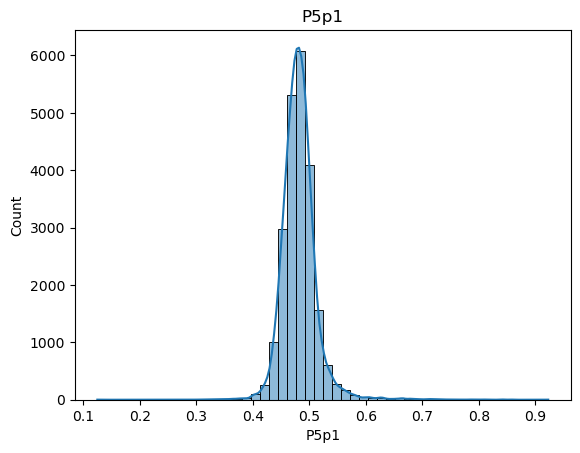

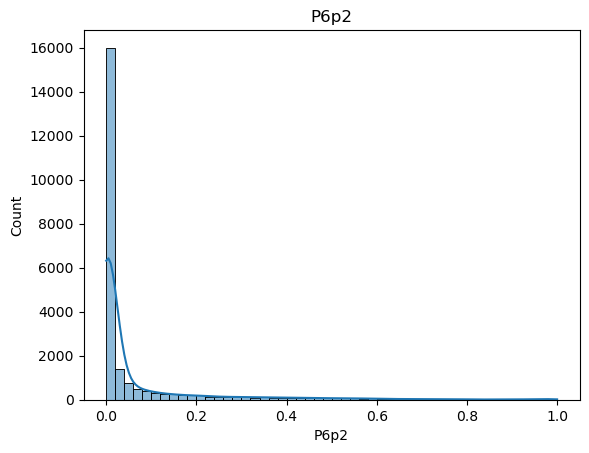

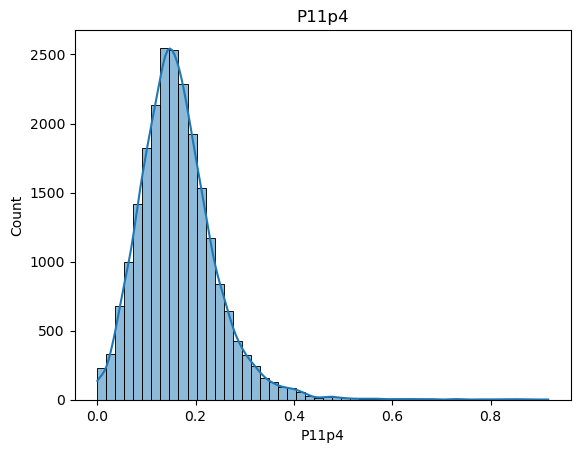

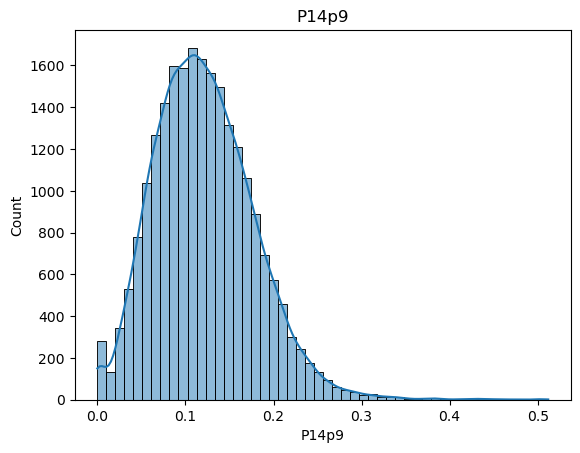

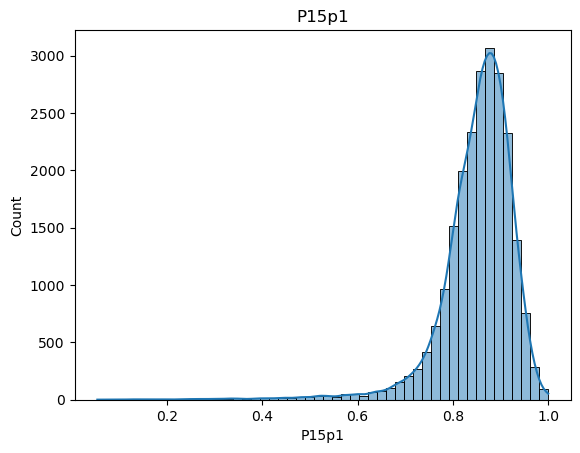

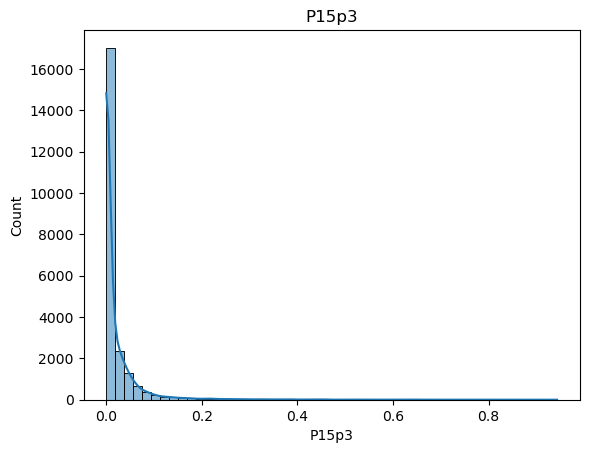

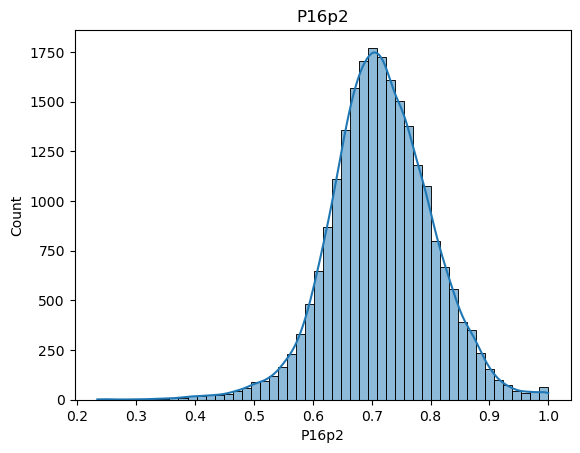

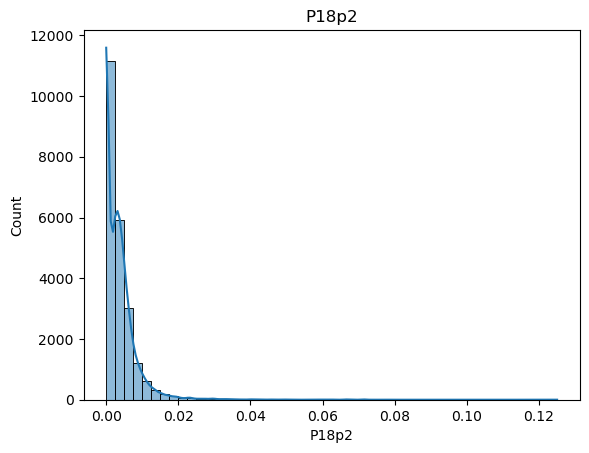

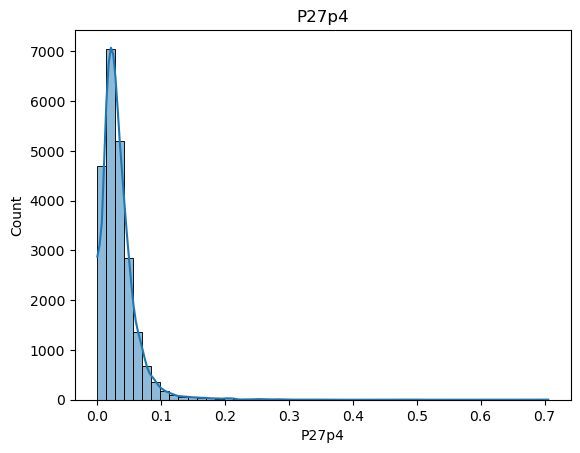

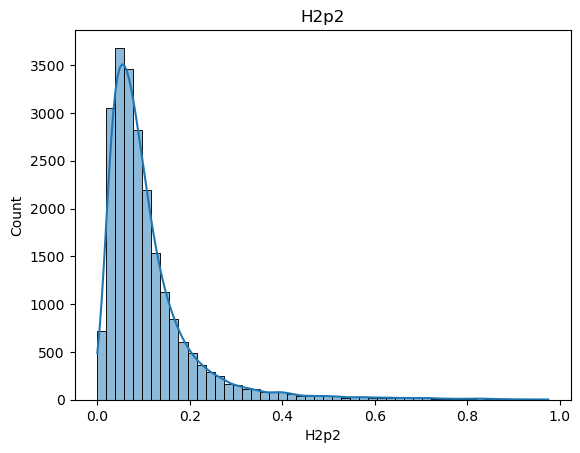

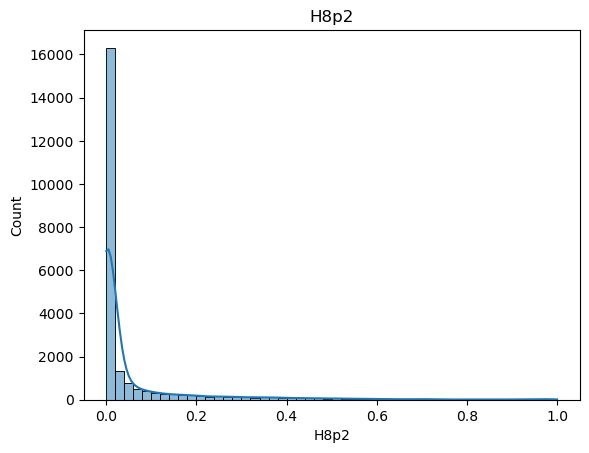

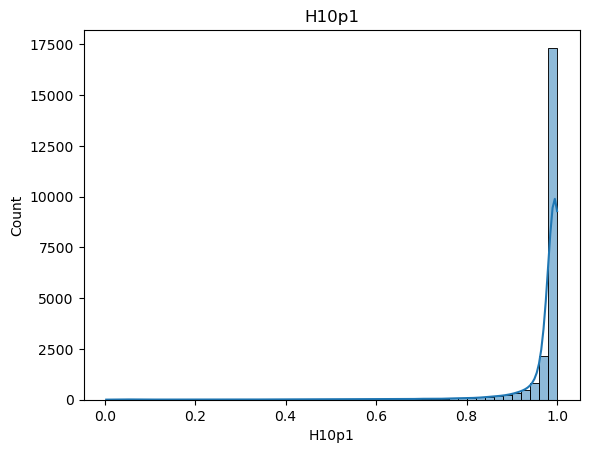

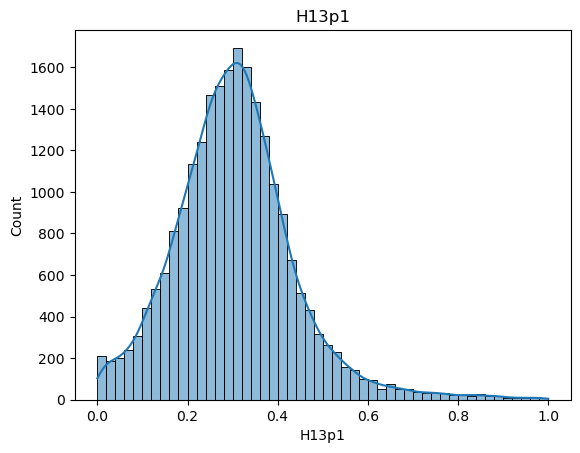

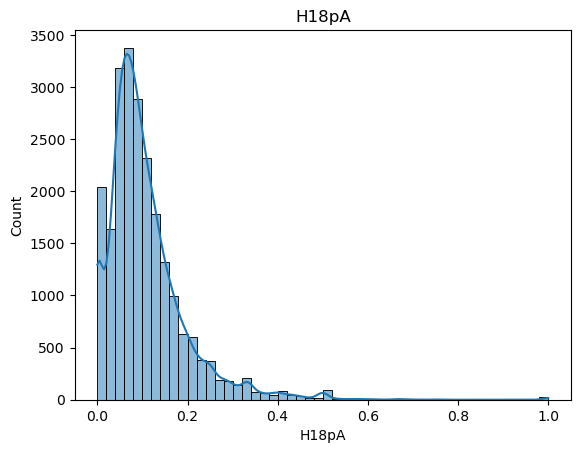

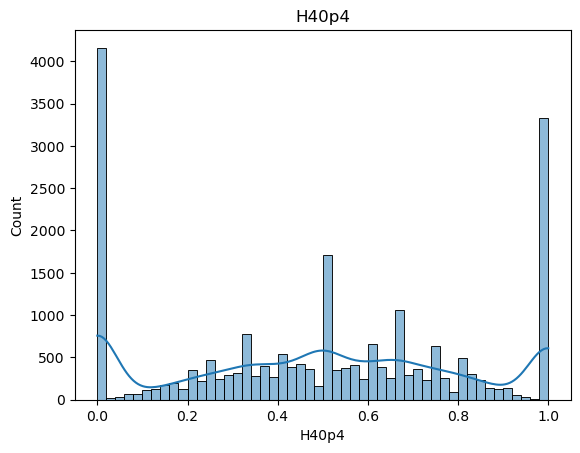

In [15]:
for col in X.columns:
    sns.histplot(X[col], bins=50, kde=True)
    plt.title(col)
    plt.show()

In [16]:
pca = PCA(n_components=16)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca)
X_pca['binaryClass'] = df['binaryClass']
X_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,binaryClass
0,7703.330802,0.315521,-0.052943,0.240194,0.080950,0.389568,-0.052684,0.201577,-0.103119,-0.114799,0.020179,-0.035259,0.010804,-0.005365,-0.004132,-0.002026,0
1,-6258.669198,-0.354397,-0.071434,-0.003970,0.044339,-0.023395,0.029173,-0.031600,-0.021181,-0.030559,0.000617,-0.010677,-0.010761,0.000102,0.005693,0.001548,1
2,-3067.669198,0.192905,-0.094723,0.003284,0.040782,-0.038776,0.018496,-0.052615,0.000905,-0.003187,-0.007891,0.012652,-0.003418,0.001031,0.002453,0.000931,1
3,-7341.669198,0.488309,-0.113639,-0.226453,-0.023325,-0.006643,0.049595,0.023063,0.011618,-0.025295,0.001714,0.010953,-0.002928,0.002201,-0.004041,0.002587,1
4,-7498.669197,-0.459481,0.853405,-0.156657,0.198937,0.076109,-0.095239,-0.033767,-0.159192,0.026838,-0.049133,0.015169,-0.002013,0.029649,0.003552,0.006798,1


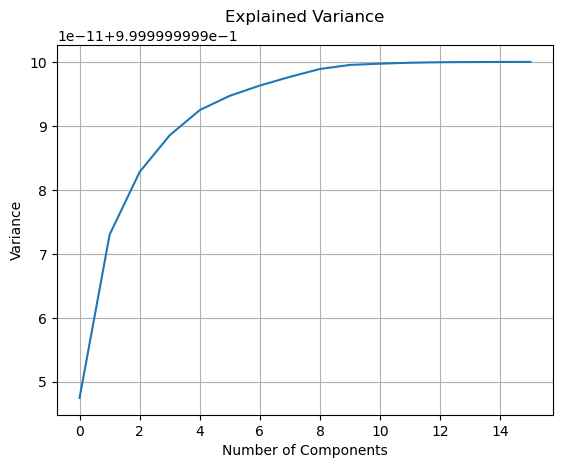

In [17]:
explained_variance = pca.explained_variance_ratio_

plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('Explained Variance')
plt.grid()
plt.show()

In [18]:
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X.iloc[:,1:])
X_pca = pd.DataFrame(X_pca)
X_pca['binaryClass'] = df['binaryClass']

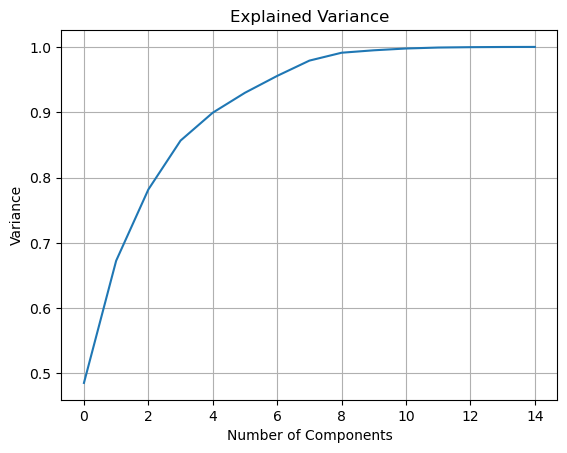

In [19]:
explained_variance = pca.explained_variance_ratio_

plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('Explained Variance')
plt.grid()
plt.show()

In [20]:
explained_variance

array([4.85479023e-01, 1.87081363e-01, 1.09148798e-01, 7.48975685e-02,
       4.27080637e-02, 3.05101322e-02, 2.58079698e-02, 2.34126743e-02,
       1.20644337e-02, 3.72543860e-03, 2.74558400e-03, 1.47043844e-03,
       5.75526548e-04, 2.72670222e-04, 1.00317221e-04])

In [21]:
kde = gaussian_kde(df.iloc[:,2])


In [22]:
x = np.linspace(0, 1, 100)
y = kde(x)

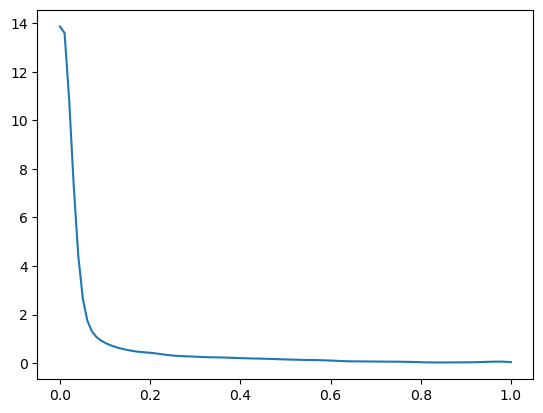

In [23]:
plt.plot(x,y)
plt.show()

Acredito que nessa etapa não devo fazer normalização, apenas analisar os dados. Retirar depois

In [25]:
X_desc = X.describe()
X_desc

,P1,P5p1,P6p2,P11p4,P14p9,P15p1,P15p3,P16p2,P18p2,P27p4,H2p2,H8p2,H10p1,H13p1,H18pA,H40p4
count,2.278400e+04,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000,22784.000000
mean,7.808669e+03,0.482297,0.063982,0.163900,0.121538,0.851076,0.020487,0.716131,0.003589,0.033263,0.110527,0.057437,0.967045,0.304993,0.107377,0.491626
std,6.587242e+04,0.031876,0.150921,0.080461,0.056687,0.079455,0.057666,0.087264,0.005100,0.029567,0.105925,0.139811,0.099953,0.133998,0.090065,0.331655
min,2.000000e+00,0.125000,0.000000,0.000000,0.000000,0.054156,0.000000,0.233702,0.000000,0.000000,0.000000,0.000000,0.003257,0.000000,0.000000,0.000000
25%,4.270000e+02,0.464647,0.000000,0.112069,0.081236,0.819686,0.000000,0.662283,0.000000,0.016260,0.049303,0.000000,0.981410,0.221674,0.052770,0.243243
50%,1.345500e+03,0.480397,0.003413,0.155484,0.117126,0.863645,0.000000,0.714286,0.002591,0.027523,0.081180,0.002538,0.994100,0.299800,0.086957,0.500000
75%,4.518250e+03,0.496040,0.033377,0.203596,0.156757,0.899657,0.019196,0.771039,0.005007,0.042827,0.131430,0.029927,1.000000,0.375000,0.137931,0.750000
max,7.322564e+06,0.923077,1.000000,0.917255,0.511872,1.000000,0.943325,1.000000,0.125000,0.705736,0.975177,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
minX, maxX = X_desc["P6p2"].iloc[3], X_desc["P6p2"].iloc[7]

In [27]:
kde_Sc = gaussian_kde(X.iloc[:, 2])
eixo_x = np.linspace(minX, maxX, 100)
eixo_y = kde_Sc(eixo_x)

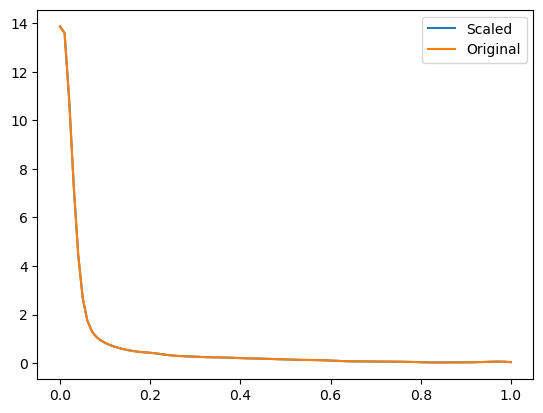

In [ ]:
plt.plot(eixo_x, eixo_y)
plt.plot(x, y)
plt.show()

Peguei a coluna 2 e comparei as estatisticas descritivas dela após retirar os outliers em X_slice

In [29]:
q1 = X.iloc[:,2].quantile(0.25)
q3 = X.iloc[:,2].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 -1.5*iqr
upper_bound = q3 +1.5*iqr

X_slice = X[(X.iloc[:,2]>lower_bound) & (X.iloc[:,2]<upper_bound)]





In [30]:
X.iloc[:,2].describe()

count    22784.000000
mean         0.063982
std          0.150921
min          0.000000
25%          0.000000
50%          0.003413
75%          0.033377
max          1.000000
Name: P6p2, dtype: float64

In [31]:
X_slice.iloc[:,2].describe()

count    18748.000000
mean         0.008908
std          0.016341
min          0.000000
25%          0.000000
50%          0.001557
75%          0.009010
max          0.083392
Name: P6p2, dtype: float64

C:\Users\gabri\AppData\Local\Temp\ipykernel_20660\3602251506.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ["Com Outliers", "Sem Outliers"] ,y= [X.iloc[:,2].mean(), X_slice.iloc[:,2].mean()], palette="viridis")


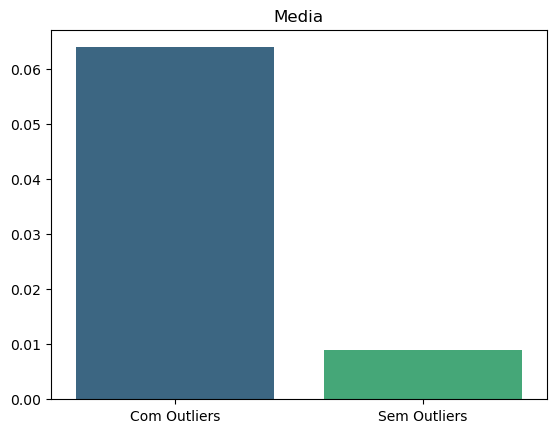

In [32]:
sns.barplot(x = ["Com Outliers", "Sem Outliers"] ,y= [X.iloc[:,2].mean(), X_slice.iloc[:,2].mean()], palette="viridis")
plt.title("Media")
plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_20660\3785268764.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ["Com Outliers", "Sem Outliers"] ,y= [X.iloc[:,2].std(), X_slice.iloc[:,2].std()], palette="viridis")


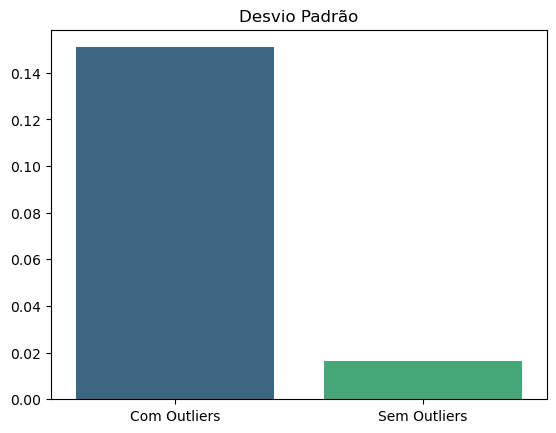

In [33]:
sns.barplot(x = ["Com Outliers", "Sem Outliers"] ,y= [X.iloc[:,2].std(), X_slice.iloc[:,2].std()], palette="viridis")
plt.title("Desvio Padrão")
plt.show()

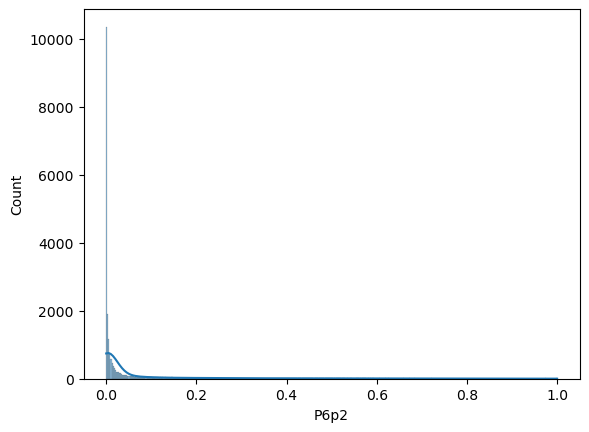

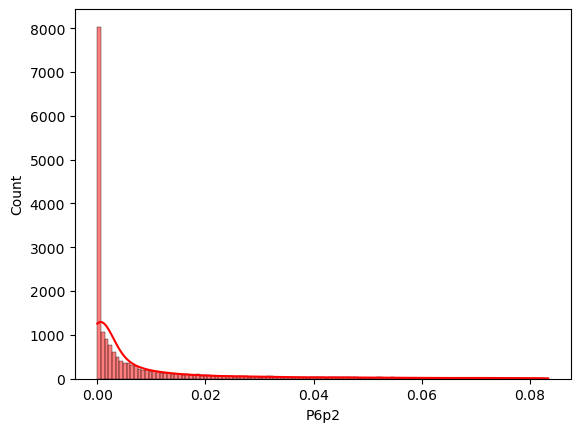

In [34]:
sns.histplot(X.iloc[:,2], kde=True)
plt.show()
sns.histplot(X_slice.iloc[:,2], color="red", kde=True)
plt.show()

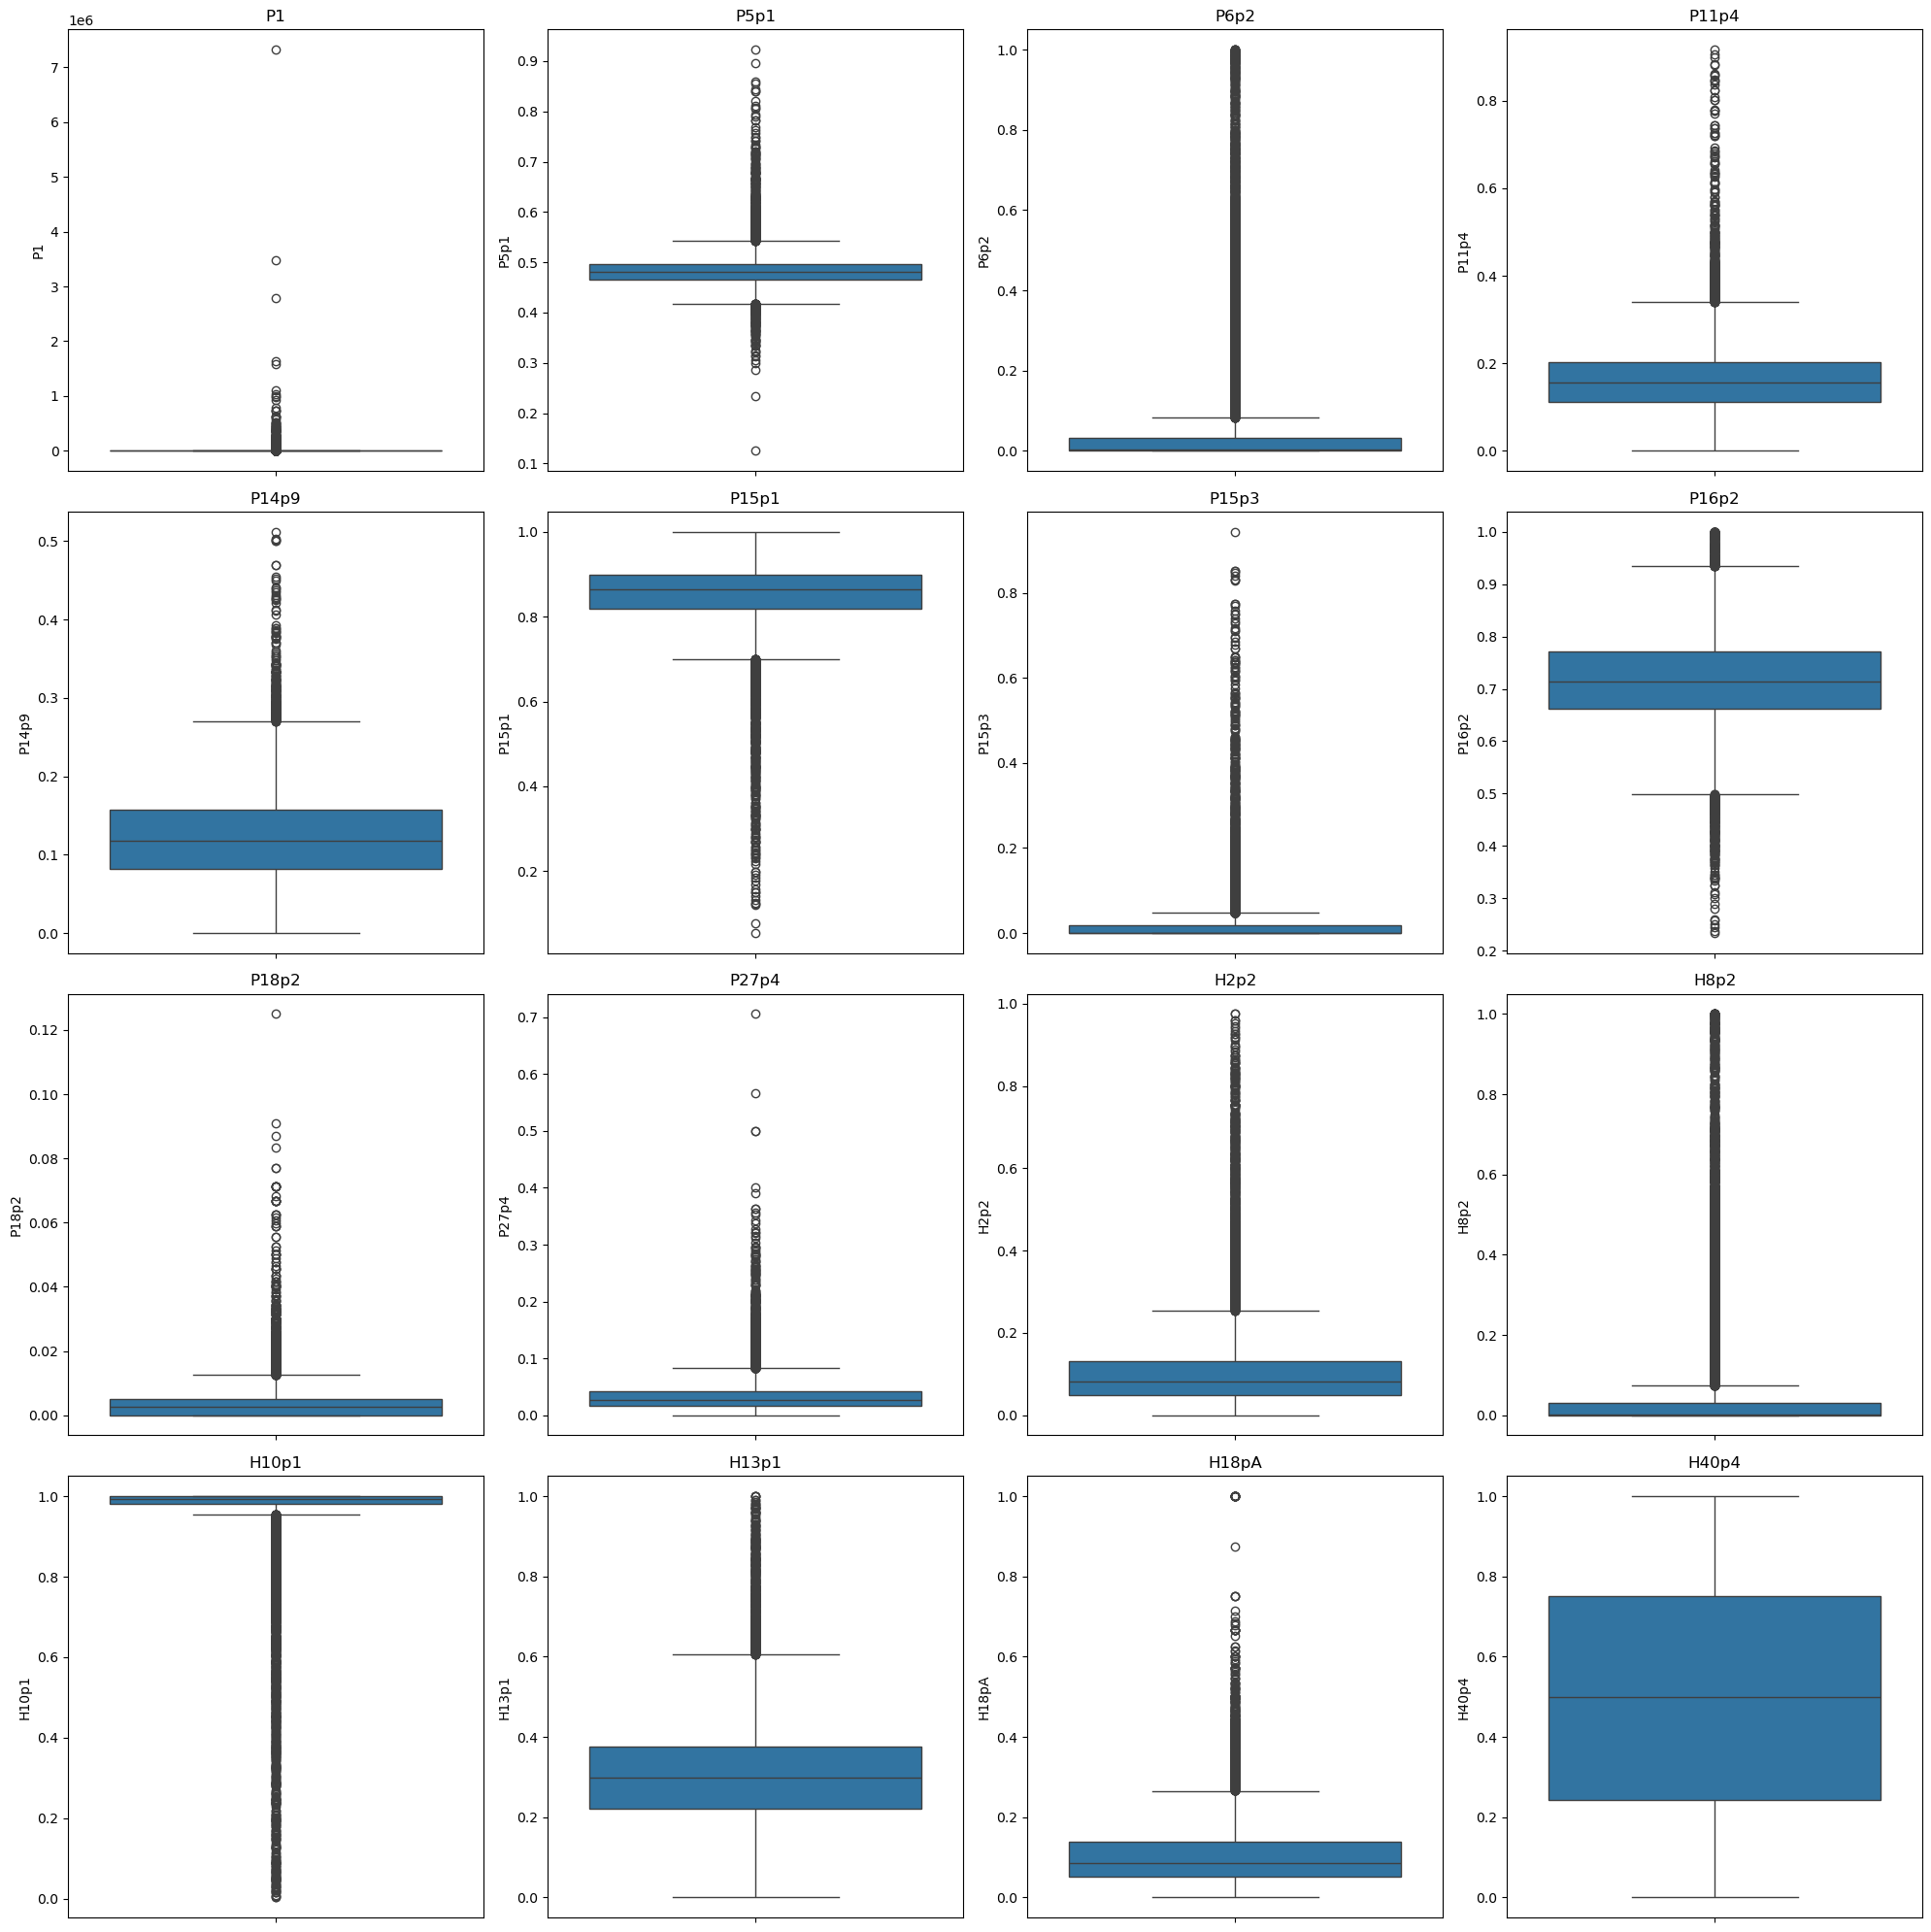

In [35]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

# Converter ax para array 1D para facilitar iteração
ax = np.array(ax).flatten()

# Gerar boxplots para cada coluna
for i, col in enumerate(X.columns):
    sns.boxplot(y=X[col], ax=ax[i])
    ax[i].set_title(col)
plt.tight_layout()
plt.show()

Descobrindo o limiar

In [36]:
df2 = pd.DataFrame(arff_file_reg[0])

In [37]:
df.head()

,P1,P5p1,P6p2,P11p4,P14p9,P15p1,P15p3,P16p2,P18p2,P27p4,H2p2,H8p2,H10p1,H13p1,H18pA,H40p4,binaryClass
0,15512.0,0.460869,0.049252,0.226470,0.149827,0.752837,0.010057,0.579729,0.003251,0.075912,0.625318,0.036613,0.991377,0.260116,0.052246,0.774059,0
1,1550.0,0.470968,0.002581,0.137419,0.096342,0.862581,0.000000,0.695142,0.005025,0.043551,0.064263,0.003350,0.994975,0.285267,0.060606,0.142857,1
2,4741.0,0.485341,0.000211,0.189412,0.135656,0.856992,0.000000,0.683584,0.004143,0.027965,0.065796,0.000000,0.997411,0.315433,0.065116,0.687500,1
3,467.0,0.498929,0.000000,0.100642,0.085470,0.907923,0.000000,0.780488,0.006098,0.018293,0.057471,0.000000,1.000000,0.149425,0.139535,1.000000,1
4,310.0,0.474194,0.680645,0.225807,0.128834,0.896774,0.000000,0.756303,0.008403,0.016807,0.077519,0.672269,0.991597,0.147287,0.000000,0.000000,1


In [38]:
df2.head()

,P1,P5p1,P6p2,P11p4,P14p9,P15p1,P15p3,P16p2,P18p2,P27p4,H2p2,H8p2,H10p1,H13p1,H18pA,H40p4,price
0,15512.0,0.460869,0.049252,0.226470,0.149827,0.752837,0.010057,0.579729,0.003251,0.075912,0.625318,0.036613,0.991377,0.260116,0.052246,0.774059,130600.0
1,1550.0,0.470968,0.002581,0.137419,0.096341,0.862581,0.000000,0.695142,0.005025,0.043551,0.064263,0.003350,0.994975,0.285266,0.060606,0.142857,40500.0
2,4741.0,0.485341,0.000211,0.189412,0.135656,0.856992,0.000000,0.683584,0.004143,0.027965,0.065796,0.000000,0.997411,0.315433,0.065116,0.687500,28700.0
3,467.0,0.498929,0.000000,0.100642,0.085470,0.907923,0.000000,0.780488,0.006098,0.018293,0.057471,0.000000,1.000000,0.149425,0.139535,1.000000,28500.0
4,310.0,0.474193,0.680645,0.225806,0.128834,0.896774,0.000000,0.756302,0.008403,0.016807,0.077519,0.672269,0.991597,0.147287,0.000000,0.000000,24100.0


In [39]:
y1 = df['binaryClass']
y2 = df2['price']

price_class = pd.DataFrame([y1, y2]).T
price_class.head()

,binaryClass,price
0,0.0,130600.0
1,1.0,40500.0
2,1.0,28700.0
3,1.0,28500.0
4,1.0,24100.0


In [40]:
price_class[price_class["binaryClass"]==1].describe().loc["max"]

binaryClass        1.0
price          50000.0
Name: max, dtype: float64

In [41]:
price_class[price_class["binaryClass"]==0].describe().loc["min"]

binaryClass        0.0
price          50100.0
Name: min, dtype: float64